In [10]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-190-1.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Phenol waste,Unnamed: 6,Unnamed: 7,Unnamed: 8,Fuel dimer,Alanine waste,Unnamed: 11
0,-420,0.000000,1.0,48.000000,0.000,0.000000,1.0,0.0000,0.000,0.000000,0.000000,NaN
1,0,7.000000,64310.2,47.446567,750.136,0.553433,100914.0,30.5566,1445.060,0.014321,0.677238,NaN
2,272,11.533333,27799.7,47.372196,368.418,0.627804,45707.8,20.3877,777.087,0.021034,0.801712,NaN
3,523,15.716667,27890.2,47.234597,451.941,0.765403,45569.0,26.8156,910.002,0.027661,0.938698,NaN
4,774,19.900000,27659.9,47.132799,508.917,0.867201,45478.0,49.7741,1000.740,0.051293,1.031286,NaN


In [11]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()


,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Waste,Unnamed: 6,Unnamed: 7,Unnamed: 8,Fuel dimer,Alanine waste,Unnamed: 11
0,-420,0.000000,1.0,48.000000,0.000,0.000000,1.0,0.0000,0.000,0.000000,0.000000,NaN
1,0,7.000000,64310.2,47.446567,750.136,0.553433,100914.0,30.5566,1445.060,0.014321,0.677238,NaN
2,272,11.533333,27799.7,47.372196,368.418,0.627804,45707.8,20.3877,777.087,0.021034,0.801712,NaN
3,523,15.716667,27890.2,47.234597,451.941,0.765403,45569.0,26.8156,910.002,0.027661,0.938698,NaN
4,774,19.900000,27659.9,47.132799,508.917,0.867201,45478.0,49.7741,1000.740,0.051293,1.031286,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        7.487780e-04 2.338386e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   7
Objective              <symfit.core.objectives.LeastSquares object at 0x7fecb9d75e50>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fecb9d75df0>

Goodness of fit qualifiers:
chi_squared            0.25797461196389654
objective_value        0.12898730598194827
r_squared              0.9300396662466849


<IPython.core.display.Javascript object>


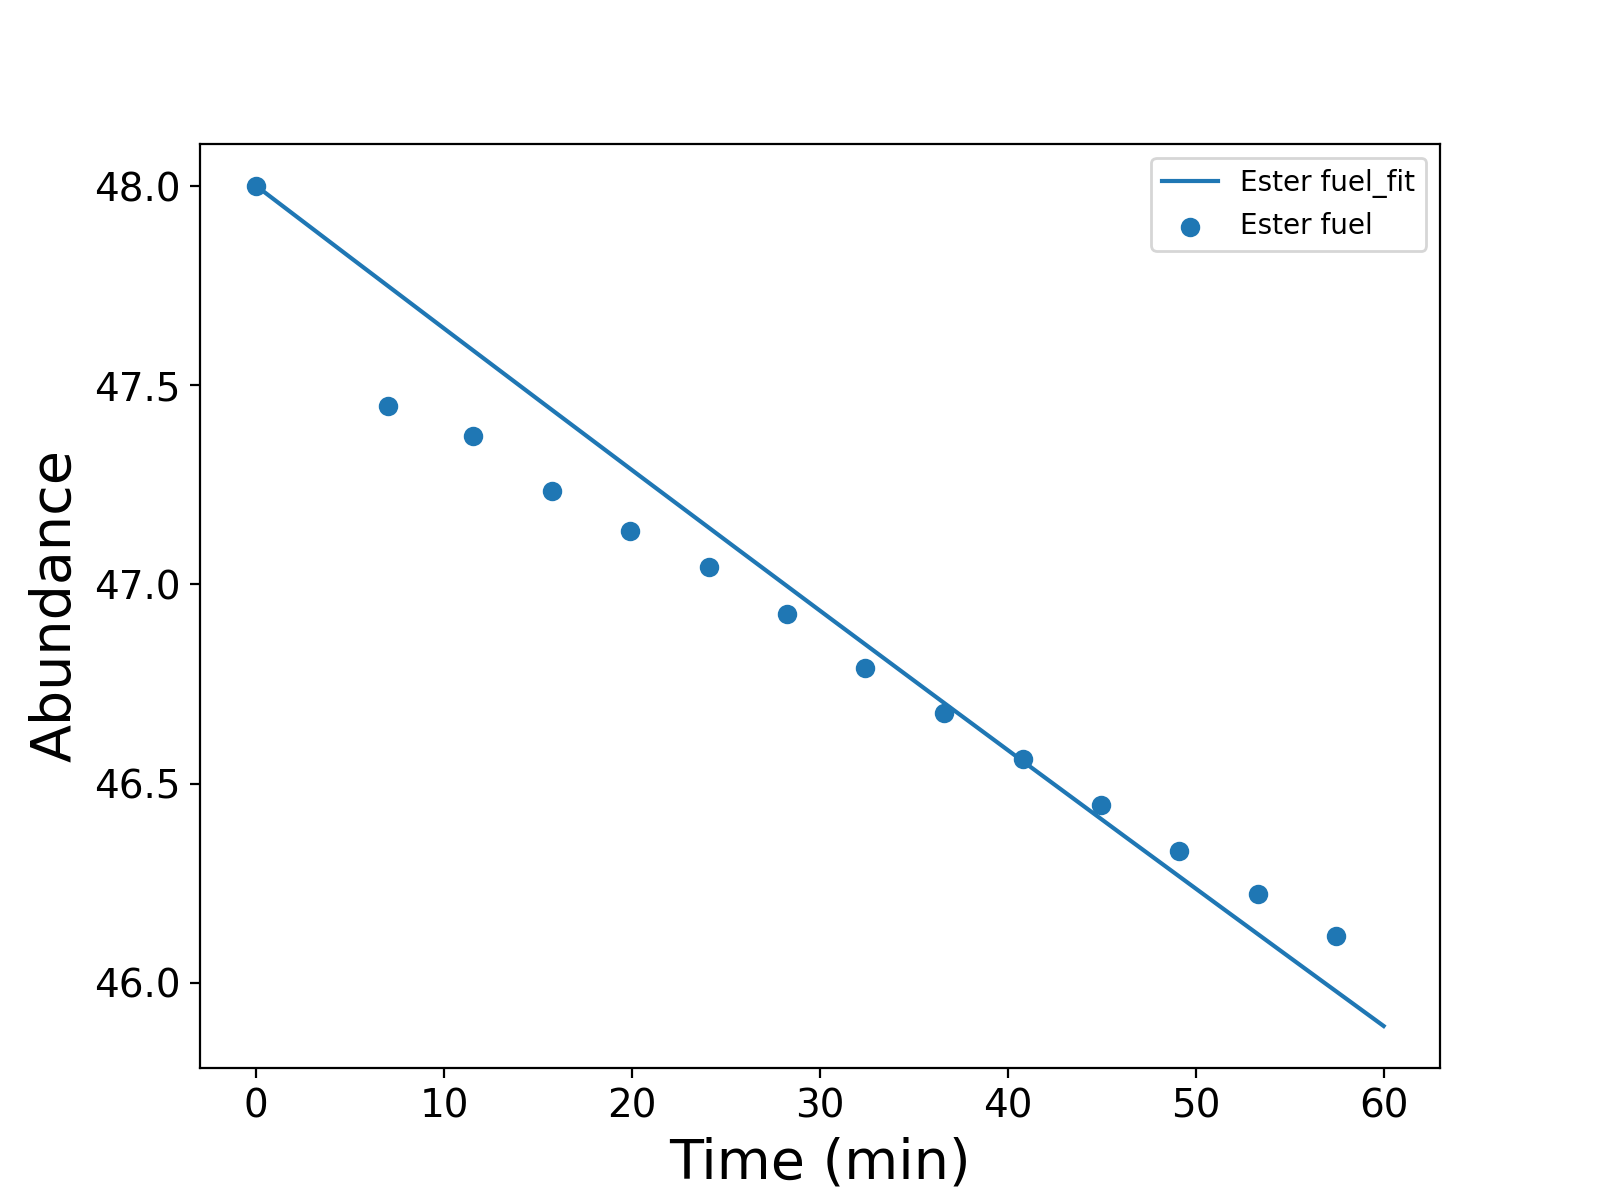

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-190-1 (pH 6.10) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [1]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-198-1.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Fuel dimer,Unnamed: 6,Phenol waste,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,-420,0.000000,1.0,48.000000,0.000,0.000000,0.000,0.000000,--,--,--
1,0,7.000000,66534.1,46.931901,617.404,0.435505,896.811,0.632594,28867.1,0,NaN
2,278,11.633333,26059.5,46.710617,199.481,0.357562,519.856,0.931821,11566.4,0,NaN
3,529,15.816667,25792.5,46.135959,361.187,0.646068,680.913,1.217973,11613,0,NaN
4,779,19.983333,25635.6,45.757678,400.096,0.714142,856.158,1.528180,11567.8,0,NaN


In [2]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Fuel dimer,Unnamed: 6,Waste,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,-420,0.000000,1.0,48.000000,0.000,0.000000,0.000,0.000000,--,--,--
1,0,7.000000,66534.1,46.931901,617.404,0.435505,896.811,0.632594,28867.1,0,NaN
2,278,11.633333,26059.5,46.710617,199.481,0.357562,519.856,0.931821,11566.4,0,NaN
3,529,15.816667,25792.5,46.135959,361.187,0.646068,680.913,1.217973,11613,0,NaN
4,779,19.983333,25635.6,45.757678,400.096,0.714142,856.158,1.528180,11567.8,0,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        2.172556e-03 2.743052e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   6
Objective              <symfit.core.objectives.LeastSquares object at 0x7fb0abafea00>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fb0abafedf0>

Goodness of fit qualifiers:
chi_squared            0.3146149517643774
objective_value        0.1573074758821887
r_squared              0.9911170946251024


<IPython.core.display.Javascript object>


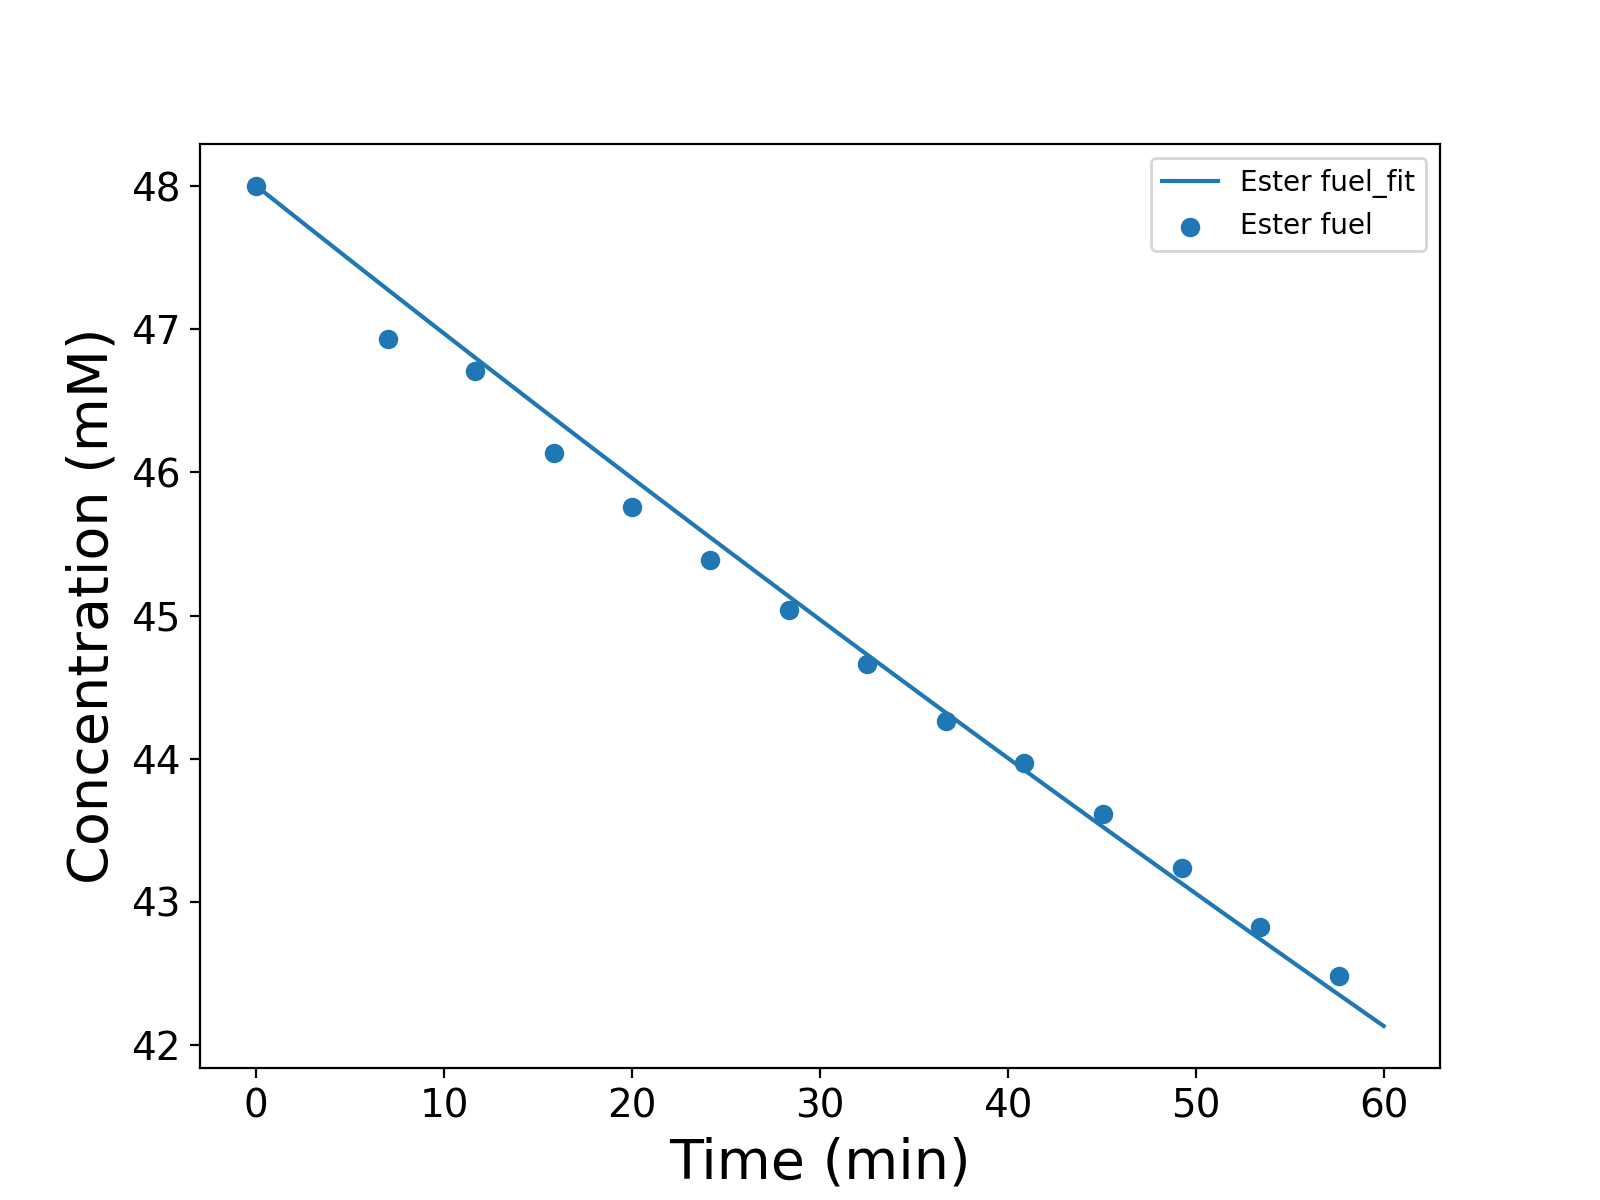

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-198-1 (pH 6.55) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [4]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-187-3.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Fuel dimer,Unnamed: 6,Phenol waste,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,-360,0.000000,1.0,48.000000,0.000,0.000000,0.00,0.000000,--,--,--
1,0,6.000000,60782.6,45.517735,1272.220,0.952716,2042.50,1.529549,25267.5,0,NaN
2,273,10.550000,25050.0,44.042304,910.074,1.600070,1340.95,2.357626,10941.1,0,NaN
3,523,14.716667,24258.9,43.020502,997.927,1.769714,1809.97,3.209784,10903.2,0,NaN
4,774,18.900000,23577.2,41.864428,1202.410,2.135038,2253.02,4.000534,10933.5,0,NaN


In [5]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Fuel dimer,Unnamed: 6,Waste,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,-360,0.000000,1.0,48.000000,0.000,0.000000,0.00,0.000000,--,--,--
1,0,6.000000,60782.6,45.517735,1272.220,0.952716,2042.50,1.529549,25267.5,0,NaN
2,273,10.550000,25050.0,44.042304,910.074,1.600070,1340.95,2.357626,10941.1,0,NaN
3,523,14.716667,24258.9,43.020502,997.927,1.769714,1809.97,3.209784,10903.2,0,NaN
4,774,18.900000,23577.2,41.864428,1202.410,2.135038,2253.02,4.000534,10933.5,0,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        6.629143e-03 9.612419e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   5
Objective              <symfit.core.objectives.LeastSquares object at 0x7fb09ac25e80>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fb09ac25e20>

Goodness of fit qualifiers:
chi_squared            2.507167745289413
objective_value        1.2535838726447066
r_squared              0.9900117859408799


<IPython.core.display.Javascript object>


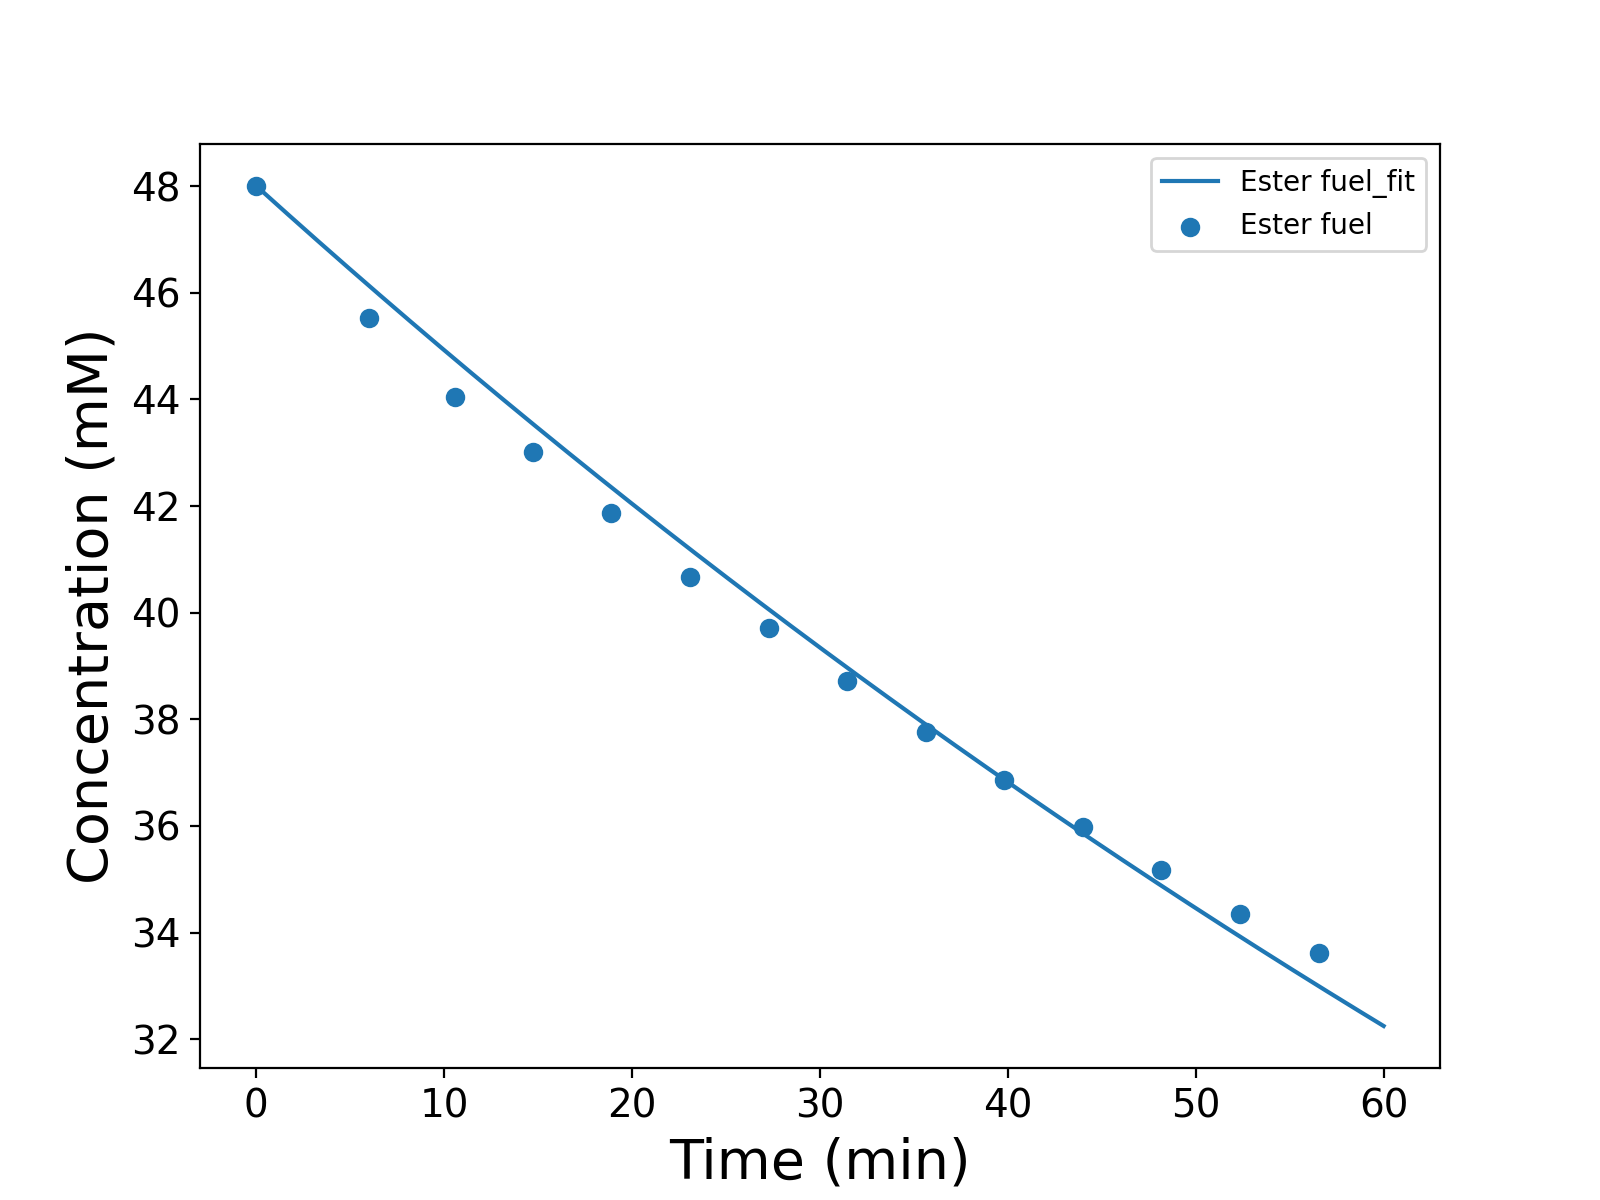

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-187-3 (pH 7.00) based on concentration. The concentration was calculated WITHOUT a external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [13]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-190-2.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Fuel dimer,Unnamed: 6,Phenol waste,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,-420,0.000000,1.00,48.000000,0.00,0.000000,0.00,0.000000,--,--,--
1,0,7.000000,38041.70,33.553223,4851.05,4.278683,11528.30,10.168095,21870.4,0,NaN
2,279,11.650000,14287.40,25.836634,3340.30,6.040435,8915.82,16.122932,11030.2,0,NaN
3,530,15.833333,11080.50,20.287616,3796.79,6.951655,11338.90,20.760728,11078,0,NaN
4,780,20.000000,8779.31,16.219173,3918.31,7.238809,13284.40,24.542018,11065,0,NaN


In [14]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Fuel dimer,Unnamed: 6,Waste,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,-420,0.000000,1.00,48.000000,0.00,0.000000,0.00,0.000000,--,--,--
1,0,7.000000,38041.70,33.553223,4851.05,4.278683,11528.30,10.168095,21870.4,0,NaN
2,279,11.650000,14287.40,25.836634,3340.30,6.040435,8915.82,16.122932,11030.2,0,NaN
3,530,15.833333,11080.50,20.287616,3796.79,6.951655,11338.90,20.760728,11078,0,NaN
4,780,20.000000,8779.31,16.219173,3918.31,7.238809,13284.40,24.542018,11065,0,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        5.256478e-02 5.050777e-04
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   4
Objective              <symfit.core.objectives.LeastSquares object at 0x7feceee1b520>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7feceee1baf0>

Goodness of fit qualifiers:
chi_squared            2.916272967445727
objective_value        1.4581364837228634
r_squared              0.9987172128587851


<IPython.core.display.Javascript object>


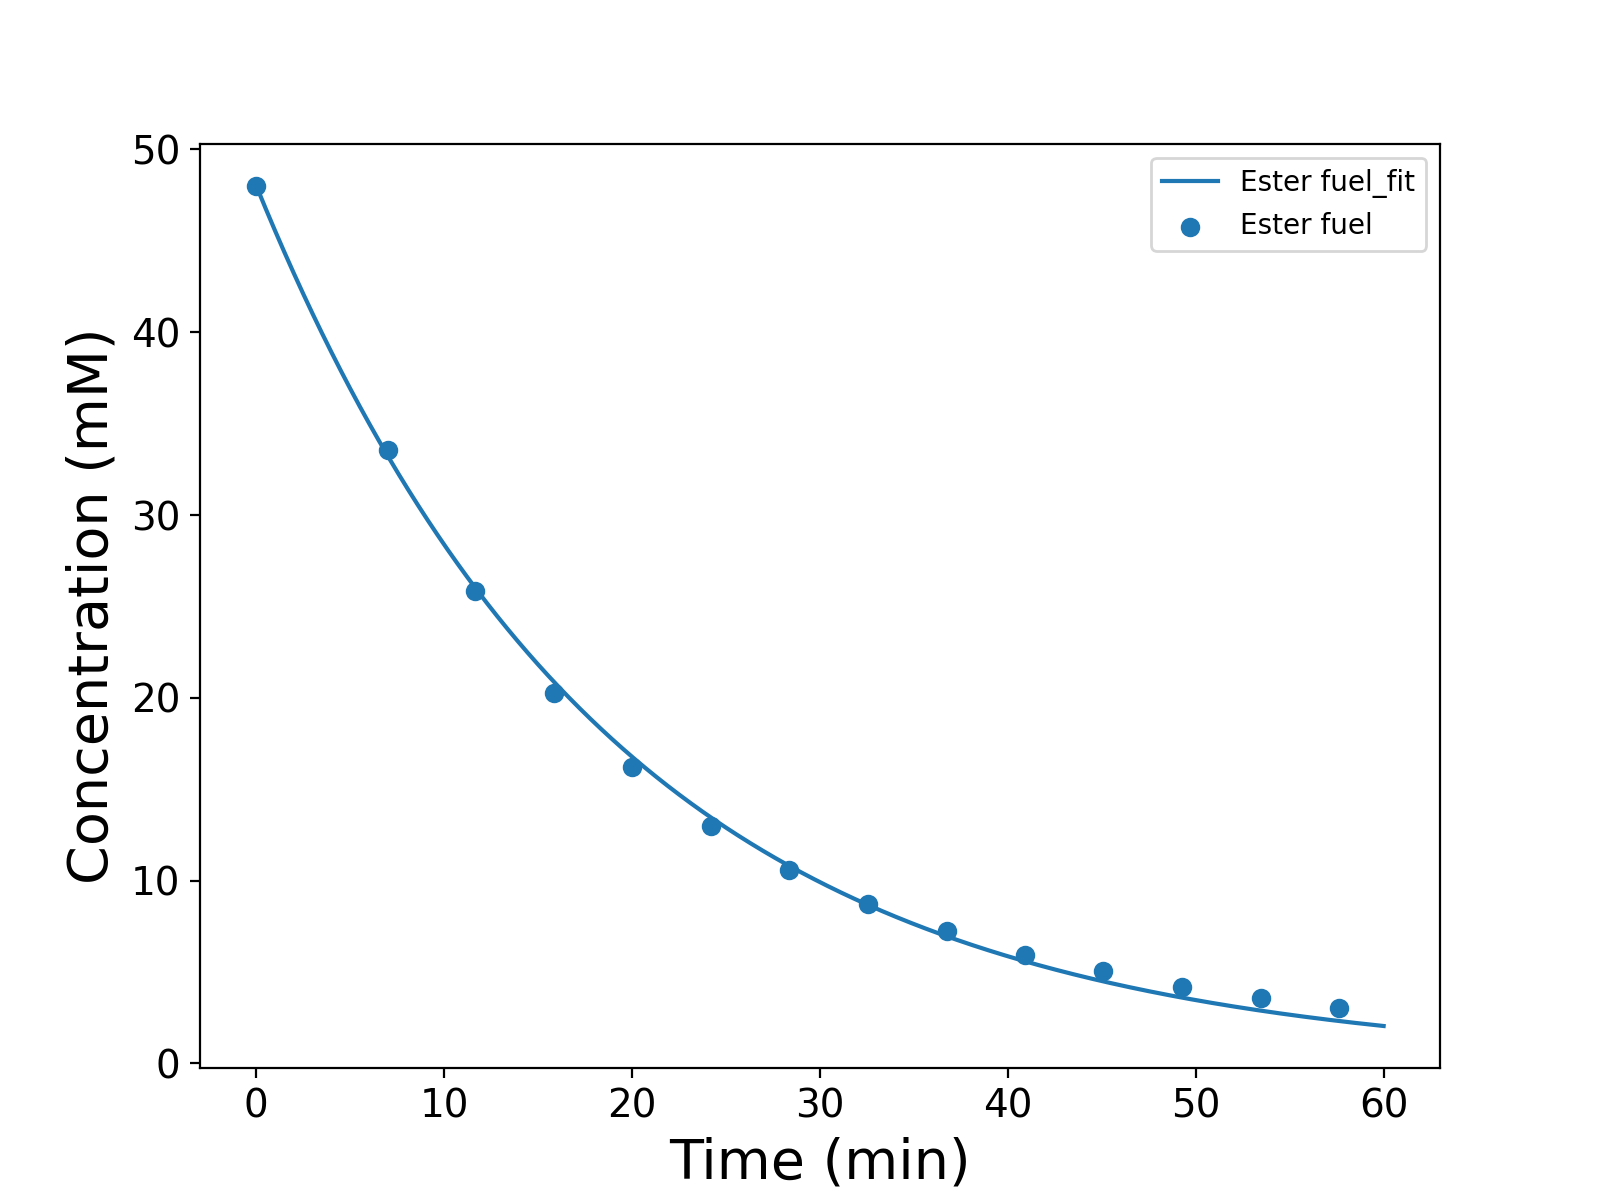

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-190-2 (pH 7.90) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()